In here we will try to increase convergence in parallel nsim by using quasi Monte Carlo. We will try this on our main example:

# 1 step quasi RMC 

In [104]:
from random import random
from scipy.stats.qmc import Halton
import numpy as np


def Y(t): return 1 + (Y(random()*t) if random()<t else 0)
def split(t,nsim,fun): return sum(fun(t) for _ in range(nsim))/nsim
def y(t,nsim):return split(t,nsim,Y)

def yq(t,nsim):
    sampler = Halton(d=1)
    sample=sampler.random(n=nsim)
    return sum(1+t*Y(t*s) for s in sample)/nsim

print(np.var(np.array([y(1,10**2) for _ in range(10**2)])))
print(np.var(np.array([yq(1,10**2) for _ in range(10**2)])))



0.006426750000000001
0.004500189999999996


# 2 step quasi RMC

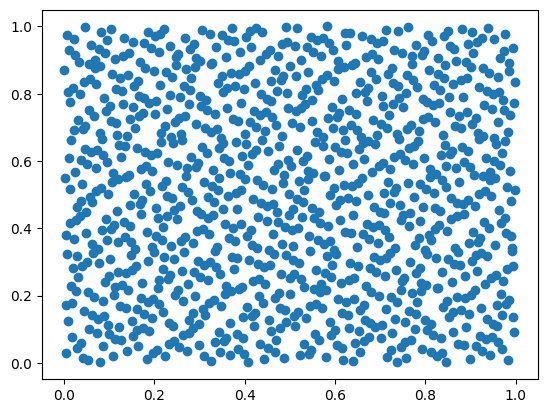

In [123]:
from random import random
from scipy.stats.qmc import Halton
import matplotlib.pyplot as plt

sampler = Halton(d=2)
sample=sampler.random(n=10**3)
x,y = zip(*sample)

plt.scatter(x,y)
plt.show()

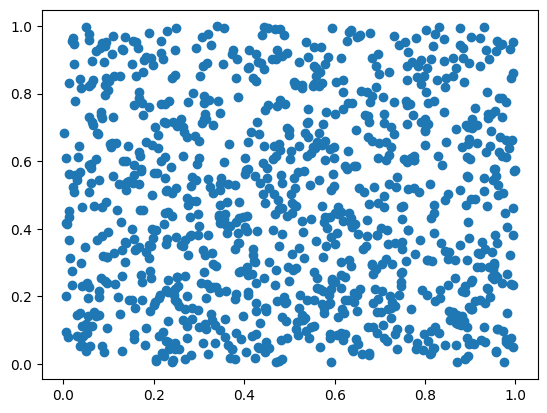

In [124]:
from random import random
import matplotlib.pyplot as plt

nsim = 10**3
x = [random() for _ in range(nsim)]
y = [random() for _ in range(nsim)]

plt.scatter(x,y)
plt.show()

In [185]:

from random import random
from scipy.stats.qmc import Halton
import numpy as np


def Y(t): return 1 + (Y(random()*t) if random()<t else 0)
def Ys(t,n): return 1 + t*Ys(random()*t,n-1) if n!=0 else Y(t)

def y(t,nsim):return sum(Ys(t,2) for _ in range(nsim))/nsim

def yq(t,nsim):
    sampler = Halton(d=2)
    sample=sampler.random(n=nsim)
    return sum(1+t*(1+t*s[0]*(Y(t*s[0]*s[1]))) for s in sample)/nsim

def test():
    print(np.var(np.array([y(1,10**2) for _ in range(10**2)])))
    print(np.var(np.array([yq(1,10**2) for _ in range(10**2)])))
test()

0.004651466413660068
0.0014018460250646272
